In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import scipy.io as sio
import os

In [45]:
# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 1000,
                       qualityLevel = 0.6,
                       minDistance = 10,
                       blockSize = 10 )

# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (40,40),
                  maxLevel = 2,
                  criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

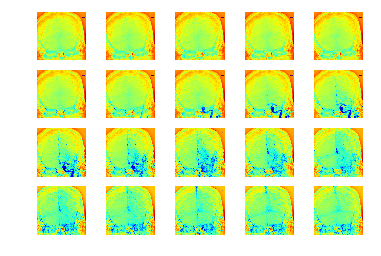

In [32]:
# Get our videos, let's try one example:
X_path = 'data/dataMat' 
fs = os.path.join(X_path, 'fractals_1.mat') # Just get 1 for now for testing
contents = sio.loadmat(fs)
video = contents['X']

# Let's try to visualize this image!
for i in xrange(20):
    plt.subplot(4,5, i+1)
    #im = np.tile(X_all[i,:,:], (3,1,1)).transpose(2,1,0)
    im = video[:,:,i] 
    imgplot = plt.imshow(im)
    plt.axis('off')

In [33]:
''' We would try and display cv2 images but then python would freeze due to a GUI issue. '''
# cv2.startWindowThread()
# cv2.namedWindow("preview")
# cv2.imshow("image", im)
# cv2.destroyAllWindows()

# Create some random colors
color = np.random.randint(0,255,(100))
print color.shape
# Transform into cv-happy format, then find corners
im = np.array((video / np.max(video))*255, dtype=np.uint8)
print im[:,:,0].shape
p0 = cv2.goodFeaturesToTrack(im[:,:,0], mask = None, **feature_params)

# Create a mask image for drawing purposes
old_frame = im[:,:,0]
mask = np.zeros_like(im[:,:,0])
frame = mask.copy()

(100,)
(1024, 1024)


In [46]:
# Attempt to display optical flow using Lucas-Kanade technique

ctr = 1
while(1):

    # calculate optical flow
    p1, st, err = cv2.calcOpticalFlowPyrLK(im[:,:,ctr-1], im[:,:,ctr], p0, None, **lk_params)

    # Select good points
    good_new = p1[st==1]
    good_old = p0[st==1]
    
    print "good_new: " , good_new
    
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new,good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv2.line(mask.copy(), (a,b),(c,d), color[i].tolist(), 2)
        frame = cv2.circle(frame.copy(),(a,b),5,color[i].tolist(),-1)
    img = cv2.add(frame,mask)

    cv2.imshow('frame',img)
    k = cv2.waitKey(30) & 0xff
    if ctr == 19:
        break

    # Now update the previous frame and previous points
    p0 = good_new.reshape(-1,1,2)
    
    ctr+=1
    
cv2.destroyAllWindows()

# Results : Not good... We see that it gets stuck at corners of the LT label thing.

good_new:  [[  980.45092773   114.04484558]
 [  964.99438477   124.99717712]
 [  939.80596924   134.80429077]
 [  943.39196777   104.74582672]
 [ 1004.24804688   104.72821808]
 [ 1004.52789307   134.77685547]]
good_new:  [[  980.45318604   114.034729  ]
 [  964.99395752   124.99753571]
 [  939.80358887   134.80560303]
 [  943.39141846   104.7455368 ]
 [ 1004.25134277   104.72795868]
 [ 1004.52886963   134.77711487]]
good_new:  [[  980.45001221   114.04881287]
 [  964.99377441   124.99755096]
 [  939.80554199   134.80474854]
 [  943.39093018   104.74501038]
 [ 1004.24707031   104.72855377]
 [ 1004.52966309   134.77709961]]
good_new:  [[  980.45330811   114.03824615]
 [  964.9942627    124.99732208]
 [  939.80792236   134.8036499 ]
 [  943.39044189   104.74446106]
 [ 1004.24200439   104.72941589]
 [ 1004.5291748    134.7767334 ]]
good_new:  [[  980.45605469   114.02900696]
 [  964.99438477   124.99655151]
 [  939.80993652   134.80247498]
 [  943.38970947   104.74462128]
 [ 1004.23913574 

In [42]:
ctr = 1
frame1 = im[:,:,0]
hsv = np.zeros((frame1.shape+(3,)), dtype=np.uint8)
print hsv.shape
hsv[...,1] = 255

while(1):
    flow = cv2.calcOpticalFlowFarneback(im[:,:,ctr-1],im[:,:,ctr], None, 0.5, 3, 15, 3, 5, 1.2, 0)

    mag, ang = cv2.cartToPolar(flow[...,0], flow[...,1])
    print ang.shape
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv,cv2.COLOR_HSV2BGR)

    cv2.imshow('frame2',rgb)
    if ctr == 19:
        break
    ctr += 1
cv2.destroyAllWindows()
# We see a slight resemblance of flow here!

(1024, 1024, 3)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
(1024, 1024)
